In [1]:
# required imports
# numpy for numerical operations
import numpy
# matplotlib for plotting
import matplotlib.pyplot
%matplotlib inline
# scipy for sigmoid function
import scipy.special

# neural network class definition
class neuralNetwork:

    # initialize the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # set the number of nodes in each layer
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # set the learning rate
        self.learning_rate = learning_rate

        # initialize weights
        self.weights_input_hidden = numpy.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.weights_hidden_output = numpy.random.normal(0.0, pow(self.output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))

        # activation function
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    # train the neural network
    def train(self, inputs, targets):
        # convert inputs and targets to 2D arrays
        inputs = numpy.array(inputs, ndmin=2).T
        targets = numpy.array(targets, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.weights_input_hidden, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.weights_hidden_output, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # calculate the error
        output_errors = targets - final_outputs
        # calculate the hidden layer's error
        hidden_errors = numpy.dot(self.weights_hidden_output.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.weights_hidden_output += self.learning_rate * numpy.dot(output_errors * final_outputs * (1.0 - final_outputs), hidden_outputs.T)
        # update the weights for the links between the input and hidden layers
        self.weights_input_hidden += self.learning_rate * numpy.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), inputs.T)
        
        pass

    # query the neural network
    def query(self, inputs):
        # convert inputs to 2D array
        inputs = numpy.array(inputs, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.weights_input_hidden, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.weights_hidden_output, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


# number of input, hidden, and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create the neural network instance
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the reduced MNIST dataset
training_data_file = open("../downloads/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network with the training data

# epochs is the number of times the training data is used to train the network
epochs = 5

for e in range(epochs):
    # go through each record in the training data
    for record in training_data_list:
        # split the record by commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
        # create the target output values
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the label for the digit
        targets[int(all_values[0])] = 0.99

        # train the neural network with the inputs and targets
        n.train(inputs, targets)
        pass
    pass

In [2]:
# load the reduced MNIST test dataset
test_data_file = open("../downloads/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [3]:
# get the first record from the test data
first_record = test_data_list[0]
# split the record by commas
all_values = first_record.split(',')
# print the label for the digit
print(all_values[0])

7


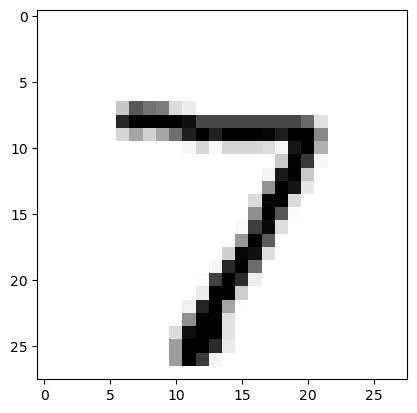

In [4]:
image_array = numpy.asarray(all_values[1:], dtype=float).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [5]:
n.query((numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01)

array([[0.001926  ],
       [0.00730318],
       [0.0030091 ],
       [0.03694957],
       [0.00418319],
       [0.02192281],
       [0.01584962],
       [0.98047043],
       [0.00491364],
       [0.00660528]])

In [6]:
# test the neural network with the test data
scorecard = []

# go through each record in the test data
for record in test_data_list:
    # split the record by commas
    all_values = record.split(',')
    # correct answer is the first value in all_values
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    # query the neural network with the inputs
    outputs = n.query(inputs)
    # the index of the highest value in outputs is the predicted label
    label = numpy.argmax(outputs)
    print(label, "predicted label")
    
    # check if the label matches the expected target
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7 correct label
7 predicted label
2 correct label
2 predicted label
1 correct label
1 predicted label
0 correct label
0 predicted label
4 correct label
4 predicted label
1 correct label
1 predicted label
4 correct label
4 predicted label
9 correct label
9 predicted label
5 correct label
5 predicted label
9 correct label
9 predicted label
0 correct label
0 predicted label
6 correct label
6 predicted label
9 correct label
9 predicted label
0 correct label
0 predicted label
1 correct label
1 predicted label
5 correct label
5 predicted label
9 correct label
9 predicted label
7 correct label
7 predicted label
3 correct label
3 predicted label
4 correct label
4 predicted label
9 correct label
9 predicted label
6 correct label
6 predicted label
6 correct label
6 predicted label
5 correct label
5 predicted label
4 correct label
4 predicted label
0 correct label
0 predicted label
7 correct label
7 predicted label
4 correct label
4 predicted label
0 correct label
0 predicted label
1 correct labe

In [7]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [8]:
# calculate the performance score
performance = numpy.asarray(scorecard).sum() / len(scorecard)
print("Performance = ", performance)

Performance =  0.9726
